<a href="https://colab.research.google.com/github/ThangallaplliHarshitha/ADM/blob/main/ADM%20Lab%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('/content/Iris.csv')

df

df.isna()

df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [7]:
X = df.drop('Species', axis=1)  # Extract features, excluding the 'Species' column
y = df['Species']  # Extract the target variable ('Species')

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Create X_scaled here


In [9]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)


In [10]:
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Species'] = y

In [11]:
plt.figure(figsize=(8, 6))
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

<Figure size 800x600 with 0 Axes>

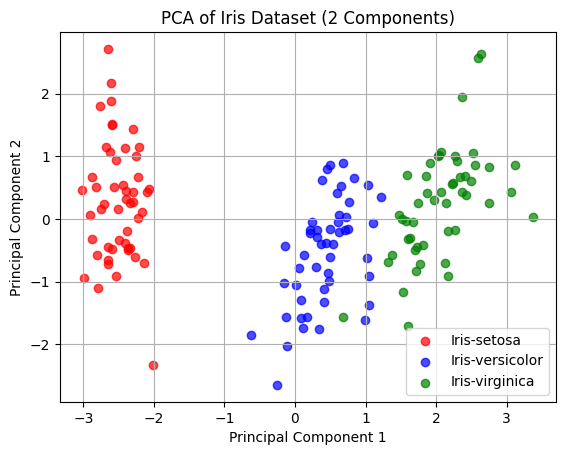

Explained Variance Ratio (2 Components): [0.7470533  0.18435257]


In [26]:
for species, color in species_colors.items():
    subset = df_pca_2d[df_pca_2d['Species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species, color=color, alpha=0.7)
    plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.legend()
plt.grid(True)
plt.show()
print("Explained Variance Ratio (2 Components):", pca_2d.explained_variance_ratio_)


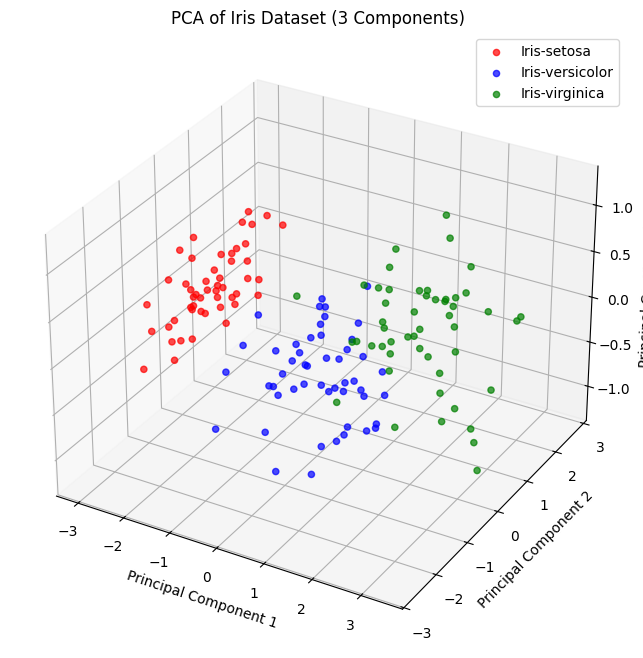

Explained Variance Ratio (3 Components): [0.7470533  0.18435257 0.04682624]


In [22]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for species, color in species_colors.items():
    subset = X_pca_3d[np.array(y == species)]
    ax.scatter(subset[:, 0], subset[:, 1], subset[:, 2], label=species, color=color, alpha=0.7)
    ax.set_title('PCA of Iris Dataset (3 Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()
print("Explained Variance Ratio (3 Components):", pca_3d.explained_variance_ratio_)